<a href="https://colab.research.google.com/github/biggymart/colab/blob/main/programmers_crane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

출처: https://programmers.co.kr/learn/courses/30/lessons/64061

게임개발자인 "죠르디"는 크레인 인형뽑기 기계를 모바일 게임으로 만들려고 합니다.
"죠르디"는 게임의 재미를 높이기 위해 화면 구성과 규칙을 다음과 같이 게임 로직에 반영하려고 합니다.

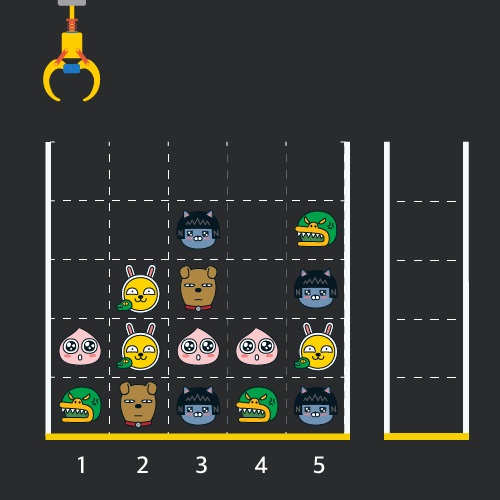

게임 화면은 "1 x 1" 크기의 칸들로 이루어진 "N x N" 크기의 정사각 격자이며 위쪽에는 크레인이 있고 오른쪽에는 바구니가 있습니다. (위 그림은 "5 x 5" 크기의 예시입니다). 각 격자 칸에는 다양한 인형이 들어 있으며 인형이 없는 칸은 빈칸입니다. 모든 인형은 "1 x 1" 크기의 격자 한 칸을 차지하며 격자의 가장 아래 칸부터 차곡차곡 쌓여 있습니다. 게임 사용자는 크레인을 좌우로 움직여서 멈춘 위치에서 가장 위에 있는 인형을 집어 올릴 수 있습니다. 집어 올린 인형은 바구니에 쌓이게 되는 데, 이때 바구니의 가장 아래 칸부터 인형이 순서대로 쌓이게 됩니다. 다음 그림은 [1번, 5번, 3번] 위치에서 순서대로 인형을 집어 올려 바구니에 담은 모습입니다.

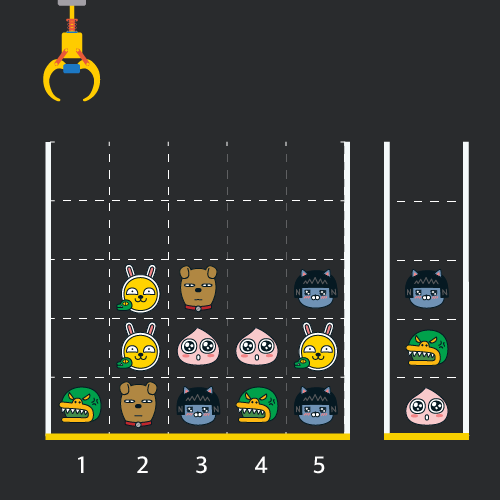

만약 같은 모양의 인형 두 개가 바구니에 연속해서 쌓이게 되면 두 인형은 터뜨려지면서 바구니에서 사라지게 됩니다. 위 상태에서 이어서 [5번] 위치에서 인형을 집어 바구니에 쌓으면 같은 모양 인형 두 개가 없어집니다.

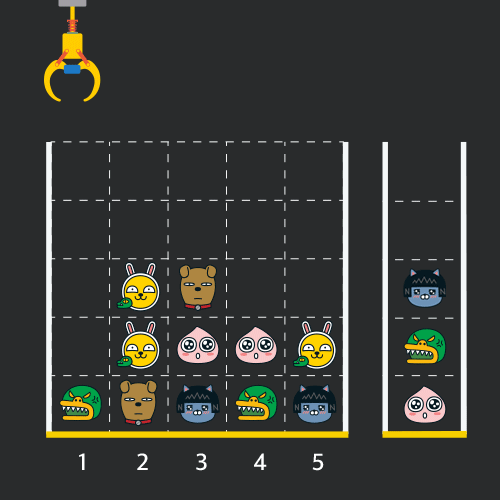

크레인 작동 시 인형이 집어지지 않는 경우는 없으나 만약 인형이 없는 곳에서 크레인을 작동시키는 경우에는 아무런 일도 일어나지 않습니다. 또한 바구니는 모든 인형이 들어갈 수 있을 만큼 충분히 크다고 가정합니다. (그림에서는 화면표시 제약으로 5칸만으로 표현하였음)

게임 화면의 격자의 상태가 담긴 2차원 배열 board와 인형을 집기 위해 크레인을 작동시킨 위치가 담긴 배열 moves가 매개변수로 주어질 때, 크레인을 모두 작동시킨 후 터트려져 사라진 인형의 개수를 return 하도록 solution 함수를 완성해주세요.

[제한사항]
board 배열은 2차원 배열로 크기는 "5 x 5" 이상 "30 x 30" 이하입니다.
board의 각 칸에는 0 이상 100 이하인 정수가 담겨있습니다.
0은 빈 칸을 나타냅니다.
1 ~ 100의 각 숫자는 각기 다른 인형의 모양을 의미하며 같은 숫자는 같은 모양의 인형을 나타냅니다.
moves 배열의 크기는 1 이상 1,000 이하입니다.
moves 배열 각 원소들의 값은 1 이상이며 board 배열의 가로 크기 이하인 자연수입니다.

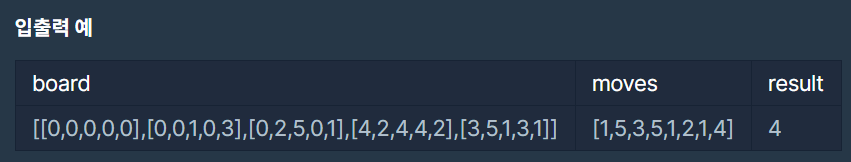

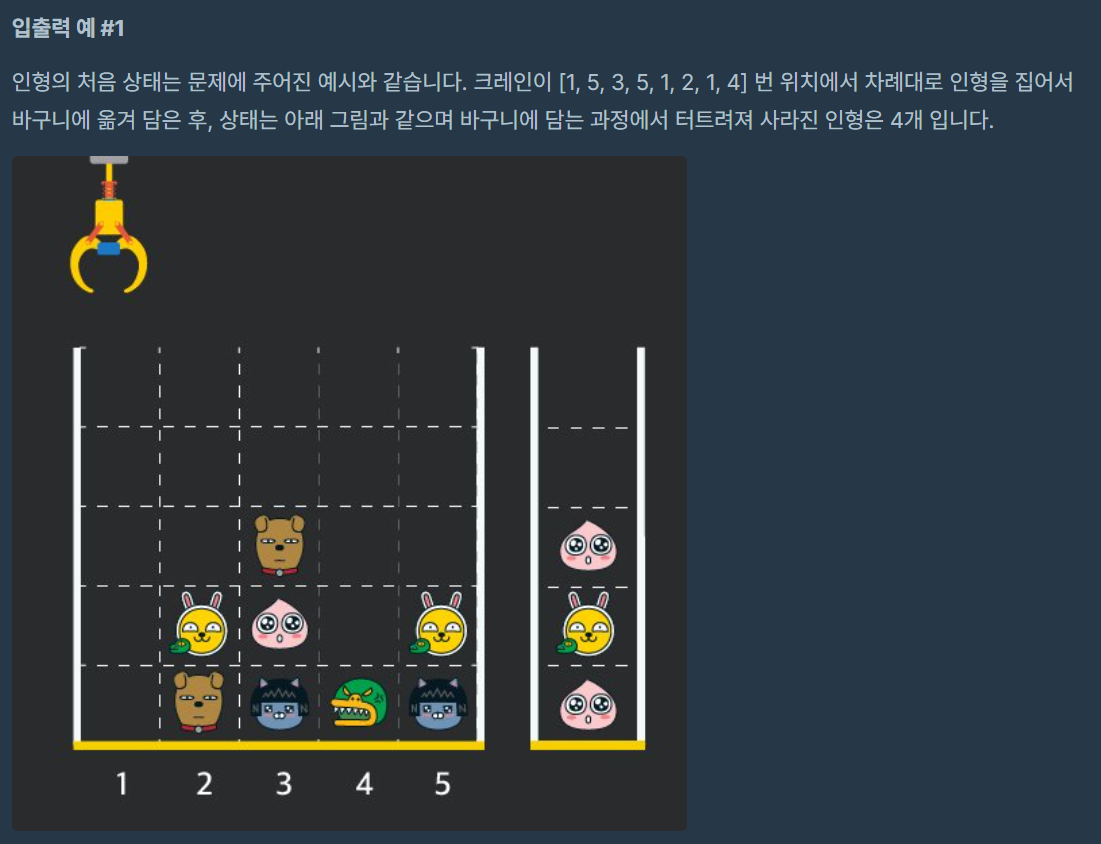

# 아래는 내 해결방법

In [ ]:
import numpy as np

board = [[0,0,0,0,0],[0,0,1,0,3],[0,2,5,0,1],[4,2,4,4,2],[3,5,1,3,1]]
moves = [1,5,3,5,1,2,1,4]

board = np.array(board)
print("Original board\n", board)
print("================")
board_tp = board.transpose()
print("Transposed board\n",board_tp)
print(board_tp.shape)

Original board
 [[0 0 0 0 0]
 [0 0 1 0 3]
 [0 2 5 0 1]
 [4 2 4 4 2]
 [3 5 1 3 1]]
Transposed board
 [[0 0 0 4 3]
 [0 0 2 2 5]
 [0 1 5 4 1]
 [0 0 0 4 3]
 [0 3 1 2 1]]
(5, 5)


In [ ]:
# crane moves and retrieves element from board

basket = []
answer = 0

for move in moves:
  move_idx = move - 1
  line = board_tp[move_idx,:]
  print("Crane is approaching this line\n", line)

  doll_idx = 0 
  for doll in line:  
    if doll == 0:
      doll_idx += 1
      continue
    else: # doll is there
      basket.append(doll)
      board_tp[move_idx, doll_idx] = 0
      doll_idx += 1
      break

  print("Now the basket is\n", basket)
  print("checking the doll popping...")
  if len(basket) >= 2:
    if basket[-1] == basket[-2]:
        print("There is a match! +2 points")
        basket = basket[:-2]
        answer += 2        

  print("As a result board is\n", board_tp)
  print("=== continue to other move ===")

print("answer is:", answer)

Crane is approaching this line
 [0 0 0 4 3]
Now the basket is
 [4]
checking the doll popping...
As a result board is
 [[0 0 0 0 3]
 [0 0 2 2 5]
 [0 1 5 4 1]
 [0 0 0 4 3]
 [0 3 1 2 1]]
=== continue to other move ===
Crane is approaching this line
 [0 3 1 2 1]
Now the basket is
 [4, 3]
checking the doll popping...
As a result board is
 [[0 0 0 0 3]
 [0 0 2 2 5]
 [0 1 5 4 1]
 [0 0 0 4 3]
 [0 0 1 2 1]]
=== continue to other move ===
Crane is approaching this line
 [0 1 5 4 1]
Now the basket is
 [4, 3, 1]
checking the doll popping...
As a result board is
 [[0 0 0 0 3]
 [0 0 2 2 5]
 [0 0 5 4 1]
 [0 0 0 4 3]
 [0 0 1 2 1]]
=== continue to other move ===
Crane is approaching this line
 [0 0 1 2 1]
Now the basket is
 [4, 3, 1, 1]
checking the doll popping...
There is a match! +2 points
As a result board is
 [[0 0 0 0 3]
 [0 0 2 2 5]
 [0 0 5 4 1]
 [0 0 0 4 3]
 [0 0 0 2 1]]
=== continue to other move ===
Crane is approaching this line
 [0 0 0 0 3]
Now the basket is
 [4, 3, 3]
checking the doll pop

# 아래는 다른 사람 해결방법

In [ ]:
def solution(board, moves):
    stacklist = []
    answer = 0

    for i in moves:
        for j in range(len(board)):
            if board[j][i-1] != 0:
                stacklist.append(board[j][i-1])
                board[j][i-1] = 0

                if len(stacklist) > 1:
                    if stacklist[-1] == stacklist[-2]:
                        stacklist.pop(-1)
                        stacklist.pop(-1)
                        answer += 2     
                break

    return answer